In [1]:
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
def read_task_set_from_txt(file):
    task_set = []
    with open(file, 'r') as txtfile:
        for line in txtfile:
            task = tuple(map(int, line.strip()[1:-1].split(', ')))
            task_set.append(task)
    return task_set

In [3]:
def readap(file):
    task_set = []
    with open(file, 'r') as txtfile:
        for line in txtfile:
            task = tuple(map(int, line.strip()[1:-1].split(', ')))
            task_set.append(task)
    return task_set

In [4]:
task_set = read_task_set_from_txt("task_set.txt")
data = task_set
df = pd.DataFrame(data, columns=['id', 'execution', 'arrival', 'period', 'dead'])
df.drop('dead',axis=1,inplace=True)
df['rem']=df['execution']
df['nextdead']=df['period']
df

,id,execution,arrival,period,rem,nextdead
0,1,17,0,399,17,399
1,2,14,0,461,14,461
2,3,25,0,422,25,422
3,4,10,0,482,10,482
4,5,13,0,300,13,300
5,6,11,0,477,11,477
6,7,14,0,477,14,477
7,8,15,0,487,15,487
8,9,20,0,383,20,383
9,10,17,0,483,17,483


In [5]:
def uti(df):
    u=sum(df['execution'] / df['period'])
    return u

In [6]:
utilization=uti(df)
bud=(int)((1-utilization)*100)
ind=len(df)
deff_sever={'id':ind+1,'execution':bud,'arrival':0,'period':250,'dead':60}
df.loc[ind]=deff_sever
df['rem']=df['execution']
df['nextdead']=df['period']
df['budget'] = df['execution']
print(bud)
df

40


,id,execution,arrival,period,rem,nextdead,budget
0,1,17,0,399,17,399,17
1,2,14,0,461,14,461,14
2,3,25,0,422,25,422,25
3,4,10,0,482,10,482,10
4,5,13,0,300,13,300,13
5,6,11,0,477,11,477,11
6,7,14,0,477,14,477,14
7,8,15,0,487,15,487,15
8,9,20,0,383,20,383,20
9,10,17,0,483,17,483,17


In [7]:
task_setap = readap("APtask_set.txt")
data = task_setap
dfap = pd.DataFrame(data, columns=['id','execution','arrival'])

dfap.sort_values('arrival',inplace=True)

dfap

,id,execution,arrival
1,2,19,8
8,9,18,8
3,4,10,9
9,10,19,13
0,1,12,24
4,5,18,36
7,8,13,36
6,7,12,49
2,3,17,51
5,6,14,53


In [8]:
sc=[]
ap=[]

In [9]:
apin = 0

for i in range(500):
    task = df[(df["arrival"] <= i) & (df["rem"] > 0)]
    aptask = dfap[(dfap['arrival'] <= i) & (dfap['execution'] > 0)]
    #print(df)
    #print(len(aptask))
    cond=False
    if len(task) > 0:
        nexttask = task.sort_values('nextdead').index[0]
        if(len(task)>=2):
            nextnexttask = task.sort_values('nextdead').index[1]
            cond=True
        ds=(df.loc[nexttask,'id']==ind+1)
        if(ds): 
            if(len(aptask)>0 and len(dfap)>apin): 
                nextap=dfap.index[apin]
                df.loc[nexttask,'rem']-=1
                dfap.loc[nextap,'execution']-=1
                if(dfap.loc[nextap,'execution']==0):
                    apin+=1
                    
                if ap and i > 0 and ap[-1]['id'] == dfap.loc[nextap, "id"] and ap[-1]['end time'] == i:
                    ap[-1]['end time'] += 1
                    ap[-1]['total time'] += 1
                else:
                    dict={'id': dfap.loc[nextap, "id"], 'start time': i, 'end time': i + 1, 'total time': 1}
                    ap.append(dict)

                if i > 0 and sc[-1]['id'] == df.loc[nexttask, "id"] and sc[-1]['end time'] == i:
                    sc[-1]['end time'] += 1
                    sc[-1]['total time'] += 1
                else:
                    dict={'id': df.loc[nexttask, "id"], 'start time': i, 'end time': i + 1, 'total time': 1}
                    sc.append(dict)
            else:
                if(cond==True): 
                    df.loc[nextnexttask,'rem']-=1
                    if i > 0 and sc[-1]['id'] == df.loc[nextnexttask, "id"] and sc[-1]['end time'] == i:
                        sc[-1]['end time'] += 1
                        sc[-1]['total time'] += 1
                    else:
                        dict={'id': df.loc[nextnexttask, "id"], 'start time': i, 'end time': i + 1, 'total time': 1}
                        sc.append(dict)
        else: 
            df.loc[nexttask,'rem']-=1
            if i > 0 and sc[-1]['id'] == df.loc[nexttask, "id"] and sc[-1]['end time'] == i:
                sc[-1]['end time'] += 1
                sc[-1]['total time'] += 1
            else:
                dict={'id': df.loc[nexttask, "id"], 'start time': i, 'end time': i + 1, 'total time': 1}
                sc.append(dict)


    arrived=df[(i+1)%df['period']==0].index
    df.loc[arrived, 'rem'] = df.loc[arrived, 'execution']
    df.loc[arrived, 'nextdead'] = df.loc[arrived, 'nextdead']+df.loc[arrived,'period']
            


In [10]:
sc1=pd.DataFrame(sc)
sc1

,id,start time,end time,total time
0,14,0,18,18
1,16,18,58,40
2,5,58,71,13
3,9,71,91,20
4,1,91,108,17
5,3,108,133,25
6,15,133,143,10
7,12,143,153,10
8,2,153,167,14
9,13,167,171,4


In [11]:
ap1=pd.DataFrame(ap)
ap1

,id,start time,end time,total time
0,2,18,37,19
1,9,37,55,18
2,4,55,58,3
3,4,291,298,7
4,10,298,317,19
5,1,317,329,12
6,5,329,331,2


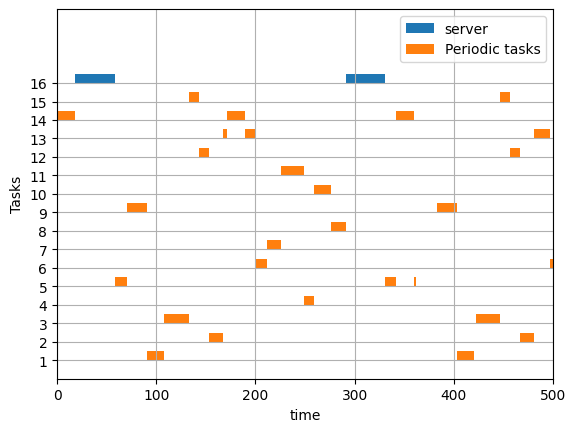

In [12]:
import matplotlib.pyplot as plt
fig, gnt = plt.subplots()
gnt.set_ylim(0, 10*(ind+5))
gnt.set_xlim(0, 500)
gnt.set_xlabel('time')
gnt.set_ylabel('Tasks')
blue_patch = plt.Rectangle((0, 0), 1, 1, fc="tab:blue", edgecolor='none')
orange_patch = plt.Rectangle((0, 0), 1, 1, fc="tab:orange", edgecolor='none')
tick=10
tc=[]
lab=[]
for i in df['id']:
    tc.append(tick)
    lab.append(i)
    tick+=10
gnt.set_yticks(tc)
gnt.set_yticklabels(lab)
gnt.grid(True)
for item in sc:
    if(item['id']==ind+1): 
        gnt.broken_barh([(item['start time'], item['end time']-item['start time'])], (10*item['id'], 5), facecolors =('tab:blue'))
    else: 
        gnt.broken_barh([(item['start time'], item['end time']-item['start time'])], (10*item['id'], 5), facecolors =('tab:orange'))

gnt.legend([blue_patch, orange_patch], [ 'server','Periodic tasks'], loc='upper right')
plt.show()


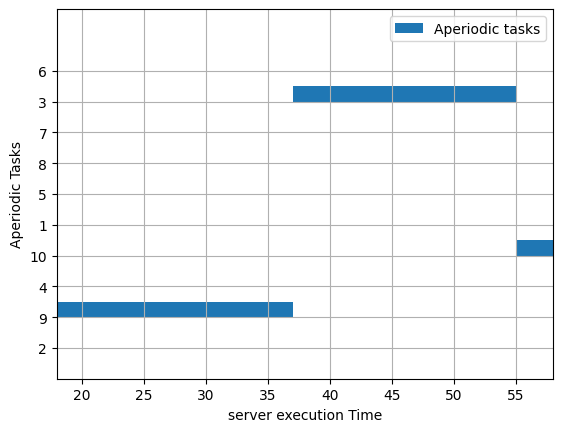

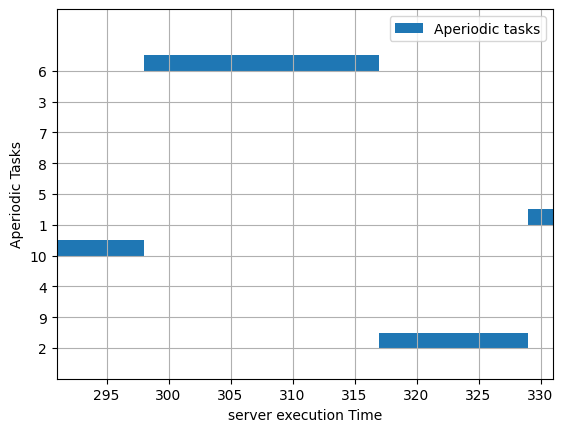

In [13]:

import matplotlib.pyplot as plt

for i in sc:
    if i['id'] == ind + 1: 
        fig, gnt = plt.subplots()
        gnt.set_ylim(0, 10 * (len(dfap) + 2))
        gnt.set_xlim(i['start time'], i['end time'])
        gnt.set_xlabel('server execution Time')
        gnt.set_ylabel('Aperiodic Tasks')
        tick = 10
        tc = []
        lab = []
        for j in dfap['id']:
            tc.append(tick)
            lab.append(j)
            tick += 10
        gnt.set_yticks(tc)
        gnt.set_yticklabels(lab)
        gnt.grid(True)
        blue_patch = plt.Rectangle((0, 0), 1, 1, fc="tab:blue", edgecolor='none')
        gnt.legend([blue_patch], ['Aperiodic tasks'], loc='upper right')
        for item in ap:
            if i['start time'] <= item['start time'] and item['end time'] <= i['end time']:
                gnt.broken_barh([(item['start time'], item['end time'] - item['start time'])],
                                (10 * item['id'], 5), facecolors=('tab:blue'))

plt.show()
